# Point this Project
Evaluate model classification to perform tweet sentiment Narendra Modi, use Naïve Bayes, SVM, KNN, LSTM, and BERT <br>

point bussiness
1. Filter word negative to goverment
2. Filter word on media social sentiment negative




In [90]:
import numpy as np
from transformers import AutoModel, AutoTokenizer
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud,STOPWORDS
from imblearn.over_sampling import SMOTE
from collections import Counter

import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle



## Import data

In [54]:
df = pd.read_csv('Twitter_Data.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [56]:
text = df['clean_text'].head(1000).values.tolist()

number = 1
for i in text:
    print(f"{number}. {i}")
    number += 1

1. when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
2. talk all the nonsense and continue all the drama will vote for modi 
3. what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax
4. asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars
5. answer who among these the most powerful world leader today trump putin modi may 
6. kiya tho refresh maarkefir comment karo 
7. surat women perform yagna seeks divine grace for narendra modi become again

8. this comes from cabinet which has scholars like modi smriti and hema time introspect
9. with upcoming election india saga going important pair look current modi lead

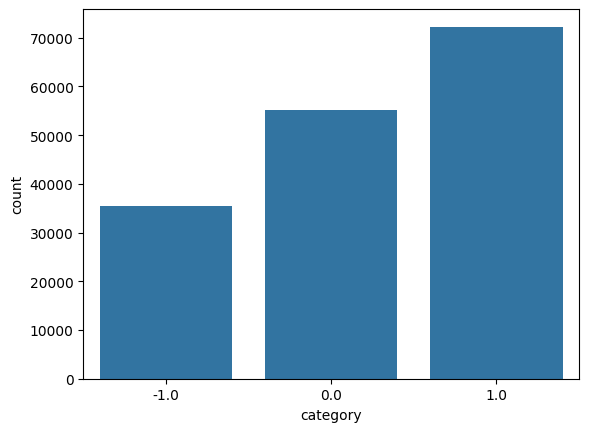

In [57]:
sns.countplot(x='category',data=df)
plt.show()

Feature Category merupakan labeling

## Preprocessing Data

In [58]:
print(f"Numbers of null ===================> \n{df.isnull().sum()}")
print(f"Numbers of duplicate ===================> {df.duplicated().sum()}")

Numbers of null ===================> 
clean_text    4
category      7
dtype: int64
Numbers of duplicate ===================> 1


In [59]:
#process data
df = df.dropna()
df = df.drop_duplicates()
print(f"Numbers of null ===================> \n{df.isnull().sum()}")
print(f"Numbers of duplicate ===================> {df.duplicated().sum()}")

Numbers of null ===================> 
clean_text    0
category      0
dtype: int64
Numbers of duplicate ===================> 0


In [60]:
def clean_data(df):
  df = df.dropna()
  df = df.drop_duplicates()
  return df

### Preprocess Link, lower str, tag

In [61]:
#remove space
df['clean_text'] = df['clean_text'].str.replace('\n',' ')
#change to lower str
df['clean_text'] = df['clean_text'].apply(lambda x: x.lower())
#remove tag like - or _
df['clean_text'] = df['clean_text'].str.replace('-'," ").str.replace('_'," ")

#### Remove Emoji


In [62]:
text = []
#emoji pattern
emoji_pattern = r"[^\w\s,.!?-]"
#remove pattern �
pattern = r"\uFFFD"
for i in df['clean_text'].values.tolist():
    clean_text = re.sub(emoji_pattern, '', i)
    clean_text = re.sub(pattern, '', clean_text)
    text.append(clean_text)


In [63]:
def preprocesss_word(df,columns) :
  #remove space
  df[columns] = df[columns].str.replace('\n',' ')
  #change to lower str
  df[columns] = df[columns].apply(lambda x: x.lower())
  #remove tag like - or _
  df[columns] = df[columns].str.replace('-'," ").str.replace('_'," ")
  #remove emoji
  text = []
  emoji_pattern = r"[^\w\s,.!?-]"
  #remove pattern �
  pattern = r"\uFFFD"
  for i in df['clean_text'].values.tolist():
      clean_text = re.sub(emoji_pattern, '', i)
      clean_text = re.sub(pattern, '', clean_text)
      text.append(clean_text)
  df['final_text'] = text
  return df

In [64]:
df['clean_text2'] = text

In [65]:
df.head(5)

,clean_text,category,clean_text2
0,when modi promised “minimum government maximum...,-1.0,when modi promised minimum government maximum ...
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...


### StopWord

In [66]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') # cleaning text dari noise khusus stop words
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [67]:
stop_words = set(stopwords.words('english'))
print(stop_words)


{'did', "don't", "we'd", 'any', 'd', "i've", 'other', 'these', 'it', 'few', "that'll", 'their', 'which', 'had', "we're", 'has', 'above', 'itself', 'just', 'on', "doesn't", "hasn't", 'this', 'she', "didn't", 'about', "hadn't", 'down', 't', 'o', 'was', 'couldn', 'an', 'or', "they'll", 'doing', 've', 'our', 'you', 'up', "isn't", 'shouldn', 'they', 'more', "shouldn't", 'if', 'myself', 'ourselves', "you'd", "i'm", 'as', 'should', 'with', 'haven', 'won', 'his', 'ma', 'mustn', 'isn', "she's", 'hasn', 'him', 'am', 'mightn', 'them', 'some', "it's", 'himself', 'be', "haven't", 'herself', 'theirs', 'i', 'now', 'too', 'having', 'than', 'until', 'that', "mightn't", 'does', 'not', "they'd", "aren't", "needn't", 'do', 'll', 'when', 'm', 'during', "you'll", 'between', 'at', 'to', 'he', 'here', 'such', 'through', "won't", 'where', "we've", "shan't", "you've", 'doesn', 'once', "wouldn't", 'under', "he'll", "i'll", 'into', "she'll", 'how', 'off', 'shan', "weren't", 'whom', 'her', 'against', 'again', 'our

In [68]:
#remove stop word
def preprocess_text(text):
    words = nltk.word_tokenize(text)
    filtered_token = []
    for token in words :
        if token not in stop_words:
            filtered_token.append(token)
    return ' '.join(filtered_token)


In [69]:
df['clean_text3'] = df['clean_text2'].apply(preprocess_text)

In [71]:
#change value use clasification
df['category'] = df['category'].astype(int)
category= {
    -1 : 'Negative',
    0 : 'Netral',
    1 : 'Positive'
}
df['category'] = df['category'].map(category)

## EDA

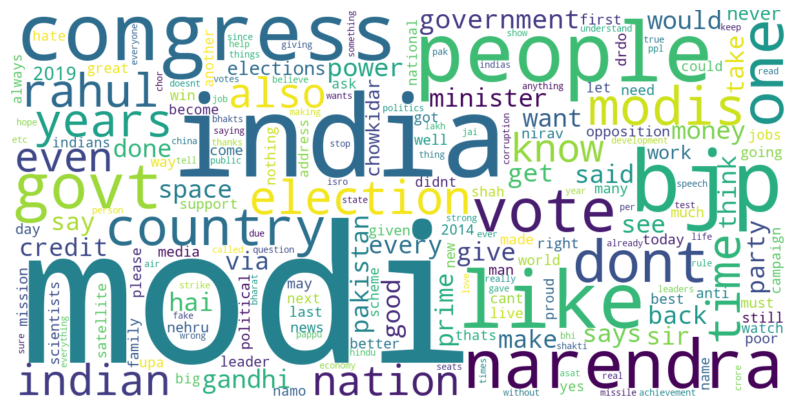

In [ ]:

# Combine all preprocessed text into a single string
all_text = ' '.join(df['clean_text3'].astype(str))

# Tokenize the combined text into words
words = nltk.word_tokenize(all_text)

# Calculate word frequencies
word_frequencies = Counter(words)

wc = WordCloud(width=1200, height=600, background_color='white')
wc.generate_from_frequencies(word_frequencies)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Feature Extraction

### Word2vec

In [73]:
from gensim.models import Word2Vec

# Tokenize each sentence into a list of words
sentence = [nltk.word_tokenize(i) for i in df['clean_text3'].values.tolist()]

model = Word2Vec(
    sentences=sentence,
    vector_size=500,
    window=5,
    min_count=2,
    workers=4,
    sg=1
)
model.save('word2vec.model')

In [74]:
print(f"Vocabulary size: {len(model.wv.index_to_key)}")
print(model.wv.index_to_key[:50]) # Print first 50 words to avoid excessive output
# print(model.wv.most_similar('modi'))

Vocabulary size: 40525
['modi', 'india', 'bjp', 'people', 'congress', 'like', 'narendra', 'govt', 'vote', 'one', 'dont', 'country', 'modis', 'election', 'years', 'rahul', 'time', 'indian', 'nation', 'even', 'also', 'know', 'government', 'power', 'get', 'gandhi', 'want', 'minister', 'good', 'give', 'space', 'would', 'money', 'says', 'said', 'hai', 'see', 'done', 'credit', 'party', 'pakistan', 'sir', 'make', 'prime', 'every', 'think', 'say', 'take', 'back', 'via']


### google-bert/bert-base-multilingual-cased

In [75]:
MODEL_NAME = 'sentence-transformers/all-MiniLM-L6-v2'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
bert_model = AutoModel.from_pretrained(MODEL_NAME)

# Pindahkan model ke GPU jika tersedia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

def get_bert_embeddings(texts, tokenizer, model, max_len=128):
    """Fungsi untuk mendapatkan vektor [CLS] dari BERT"""
    model.eval()
    embeddings = []
    
    for text in texts:
        # Tokenisasi dan Encoding
        encoded_input = tokenizer(
            text, 
            padding='max_length', 
            truncation=True, 
            max_length=max_len, 
            return_tensors='pt'
        ).to(device)
        
        # Dapatkan Output dari BERT
        with torch.no_grad():
            output = model(**encoded_input)
            
        # Ekstraksi Vektor [CLS] (Representasi seluruh kalimat)
        # output[0] adalah hidden states dari layer terakhir
        # [:, 0, :] memilih token pertama, yaitu [CLS]
        cls_embedding = output[0][:, 0, :].cpu().numpy().flatten()
        embeddings.append(cls_embedding)
        
    return np.array(embeddings)

Mennggunakan model dari hugging face membutuhkan waktu 1 jam lebih, lebih baik menggunakan TFIDF yang memiliki kecepatan lebih baik

### TFIDF

In [94]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, precision_score
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['clean_text3'])
y = df['category']


### SMOTE Category

In [97]:
smote = SMOTE()
X_res, y_res = smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


## Classfication

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import mlflow

In [88]:
mlflow.set_tracking_uri('sqlite:///mlflow.db')
mlflow.set_experiment('sentiment_analysis_modi')
def evaluate_model(y_test,y_pred):
    return {
        "accuracy_score" : accuracy_score(y_test,y_pred),
        "classification_report" : classification_report(y_test,y_pred)
    }

2025/11/25 20:17:21 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/11/25 20:17:22 INFO mlflow.store.db.utils: Updating database tables
2025-11-25 20:17:22 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-11-25 20:17:22 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
2025-11-25 20:17:22 INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
2025-11-25 20:17:22 INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
2025-11-25 20:17:23 INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
2025-11-25 20:17:23 INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
2025-11-25 20:17:23 INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
2025-11-25 20:17:23 INFO  [alembic.runtime.mig

In [117]:
models = {
    'Logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'solver': ['liblinear', 'lbfgs','saga'],
            'max_iter': [100, 200, 300]
        }
    },

    'Naive_bayes': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.1, 0.5, 1.0]
        }
    },

    'KNN_classifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },

    'Random_forest_classifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 6, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'random_state': [42]
        }
    },
}


In [118]:
models

{'Logistic_regression': {'model': LogisticRegression(),
  'params': {'solver': ['liblinear', 'lbfgs', 'saga'],
   'max_iter': [100, 200, 300]}},
 'Naive_bayes': {'model': MultinomialNB(),
  'params': {'alpha': [0.1, 0.5, 1.0]}},
 'KNN_classifier': {'model': KNeighborsClassifier(),
  'params': {'n_neighbors': [3, 5, 7, 9],
   'weights': ['uniform', 'distance'],
   'metric': ['euclidean', 'manhattan']}},
 'Random_forest_classifier': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [100, 200, 300],
   'max_depth': [None, 6, 10, 20],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4],
   'random_state': [42]}}}

In [119]:
for model_name, model_info in models.items():
    with mlflow.start_run(run_name=model_name):
        # log model parameters
        mlflow.log_params(model_info['params'])
        
        # train model
        model = model_info['model'].set_params(**model_info['params'])
        model.fit(X_train, y_train)
        
        #make predictions
        y_pred= model.predict(X_test)
        
        
        
        #calculate metrics
        metrics = evaluate_model(y_test,y_pred)
        mlflow.log_metrics(metrics)
        
        # log model
        mlflow.sklearn.log_model(model,model_name,registered_model_name=f"{model_name}_model")
        
        print(f"\nModel: {model_name}")
        for metric_name, metric_value, in metrics.items():
            print(f"{metric_name}: {metric_value:.4f}")    
        

InvalidParameterError: The 'max_iter' parameter of LogisticRegression must be an int in the range [0, inf). Got [100, 200, 300] instead.

In [ ]:
word = " Fuck Bitch  Like Modi  you "
word_vec = tfidf_vectorizer.transform([word])
prediction = model_log.predict(word_vec)
print(prediction)


['Negative']


In [36]:
word_vec


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (1, 92870)>

## Create Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(), 'clean_text3')
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', LogisticRegression())
])